In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
results = pd.read_csv('nlbse22_test_with_llama3_predictions_few_shot_v2.csv')
print(results.shape[0])

80518


In [3]:
results.head()

,Unnamed: 0.1,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_prediction
0,0,6,https://api.github.com/repos/tlnagy/TIFF.jl/issues/7,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found","One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",(i) bug report
1,1,19,https://api.github.com/repos/tisboyo/Twitch_Bot/issues/57,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN,(ii) enhancement report
2,2,25,https://api.github.com/repos/DrWhoCares/imgdanke/issues/70,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",(ii) Enhancement report
3,3,30,https://api.github.com/repos/DrWhoCares/imgdanke/issues/72,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,(i) bug report
4,4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN,(i) bug report


In [4]:
results['llama3_prediction'].value_counts()

llama3_prediction
(ii) enhancement report                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       27256
(i) bug report                                                                                                                                                                                                                                                                                                                    

In [5]:
results['llama3_prediction'].unique()

array(['(i) bug report', '(ii) enhancement report',
       '(ii) Enhancement report', '(iii)', '(ii) Enhancement Report',
       '(i) Bug Report', '(i)', '(i) Bug report', '(iii) something else',
       '(ii)', '(iii) Something else', '(i) Enhancement Report',
       '(i) Enhancement report',
       "The category of this issue is (ii) enhancement report. The user is trying to add two OAL metrics that are given by an official document to the core.OAL, but it's getting an error, which suggests that they are proposing a change or improvement rather than reporting a bug.",
       '(i) Enhancement reports',
       'The category of this issue is:\n\n(ii) Enhancement report',
       '(i) enhancement report', '(iii) Enhancement report',
       '(ii) enhancement report #888', '(iii) Enhancement Report',
       'The category of this issue is:\n\n(ii) Enhancement Report',
       '(i) Bug report\n\nThe issue is that Firefox sends a GET request for a "favicon.ico" file when loading a page, which ca

In [6]:
len(results['llama3_prediction'].unique())

38

In [7]:
results['llama3_prediction_organized'] = results['llama3_prediction']

Arranging bug answers

In [8]:
bug_labels = {'(i) bug report',
              '(i) Bug report',
              '(i)',
              '(i) Bug Report',
              '**(i)**'}

results['llama3_prediction_organized'] = results['llama3_prediction_organized'].replace(bug_labels, 'bug')

Arranging enhancement answers

In [9]:
enhancement_labels = {'(ii) enhancement report',
                      '(ii) Enhancement report',
                      '(ii) Enhancement Report',
                      '(ii)',
                      '(i) Enhancement report',
                      '(i) Enhancement Report',
                      '(i) enhancement report',
                      '(iii) Enhancement report',
                      '(iii) Enhancement Report',
                      '(ii) enhancement report-lint cache clean',
                      '(iii) enhancement report',
                      '(i) Enhancement reports',
                      'The category of this issue is (ii) enhancement report. The issue description indicates that the submitter wants to know if there is a plan to support OpenTracing v0.33.0, which suggests a request for future development or feature addition rather than reporting an existing bug or problem.',
                      '(ii) enhancement report #888',
                      '(ii) enhancement report-added-by-default'}

results['llama3_prediction_organized'] = results['llama3_prediction_organized'].replace(enhancement_labels, 'enhancement')

Arranging something else answers

In [10]:
out_of_scope_labels = {'(iii)',
                       '(iii) something else',
                       '(iii) Something else',
                       '(iii) Something else.',
                       '(iii) Something Else',
                       '(iii) Log report',
                       'The category of this issue is (iii) something else.'}

results['llama3_prediction_organized'] = results['llama3_prediction_organized'].replace(out_of_scope_labels, 'out-of-scope')

In [11]:
results['llama3_prediction_organized'].value_counts()

llama3_prediction_organized
bug                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           37323
enhancement                                                                                                                                                                                                                                                                                                             

Arranging long sentences from the csv file

In [12]:
results['llama3_prediction_organized'].to_excel('nlbse22_test_with_llama3_predictions_few_shot_v2_review.xlsx')

In [13]:
results.loc[4344,'llama3_prediction_organized']

"The category of this issue is (ii) enhancement report. The user is trying to add two OAL metrics that are given by an official document to the core.OAL, but it's getting an error, which suggests that they are proposing a change or improvement rather than reporting a bug."

In [14]:
results.loc[4344,'llama3_prediction_organized'] = 'enhancement'

In [15]:
results.loc[7841,'llama3_prediction_organized']

'The category of this issue is:\n\n(ii) Enhancement report'

In [16]:
results.loc[7841,'llama3_prediction_organized'] = 'enhancement'

In [17]:
results.loc[21768,'llama3_prediction_organized']

'The category of this issue is:\n\n(ii) Enhancement Report'

In [18]:
results.loc[21768,'llama3_prediction_organized'] = 'enhancement'

In [19]:
results.loc[38501,'llama3_prediction_organized']

'(i) Bug report\n\nThe issue is that Firefox sends a GET request for a "favicon.ico" file when loading a page, which can result in a 404 Not Found response code if the file does not exist on the server. This behavior seems unnecessary and may be considered a bug or a feature that should be configurable.\n\nThe description of the issue includes several updates with various sources and discussions related to the topic, including Firefox\'s handling of favicons, browser differences, and potential workarounds. The overall category is a bug report because it describes a problem with Firefox\'s behavior that may be considered undesirable or incorrect.'

In [20]:
results.loc[38501,'llama3_prediction_organized'] = 'bug'

In [21]:
results.loc[44119,'llama3_prediction_organized']

'The category of this issue is (iii) something else.\n\nReasoning: The issue description does not indicate a specific problem with the functionality of SkyWalking (bug), nor does it suggest a new feature or improvement (enhancement report). Instead, it appears to be an inquiry or discussion about optimizing agent performance and setting a sampling policy, which falls under the "Question" category.'

In [22]:
results.loc[44119,'llama3_prediction_organized'] = 'out-of-scope'

In [23]:
results.loc[44458,'llama3_prediction_organized']

'(ii), (iii), and (iv)'

In [24]:
results.iloc[44458:44459]

,Unnamed: 0.1,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_prediction,llama3_prediction_organized
44458,44458,443342,https://api.github.com/repos/PalisadoesFoundation/talawa/issues/355,enhancement,2021-03-16T16:31:58Z,CONTRIBUTOR,https://api.github.com/repos/PalisadoesFoundation/talawa,Organization Settings Page,"I encountered an issue with the new organization settings page implemented.\r\n\r\n 1. It doesn't allow me as a member to leave any organization. **[Bug]**\r\n https://thepalisadoes-dyb6419.slack.com/files/U01QZEFJSCE/F01QYUR2A3H/t_video6235250589085729285__1_.mp4\r\n 2. As a member this page should be adaptive accordingly like it should either show me the toast in remove member page on marking any member for remove or it should not show me the options to remove member in the organization page. **[Enhancement]**\r\n https://thepalisadoes-dyb6419.slack.com/files/U01QZEFJSCE/F01RDN4F57U/photo6235250589541969025.jpg\r\n 3. Accept membership request should only be visible to private organizations that too only if the user is admin. Adding to this one the page loads empty if there are no member join requests, displaying a proper message would be a better choice. **[Enhancement]**\r\n 4. As a organization admin, if a remove a user and if the user happens to be a admin then there's a feature which prevents this to happen but I feel this could be enhanced by either displaying a proper toast or we can show on the member name tile itself if the user is admin similar to whatsapp. This could also help other members as well to know who are there organization's admins. **[Feature/Enhancement]**\r\n https://user-images.githubusercontent.com/44184786/111338728-2c878b00-869d-11eb-822d-88f3bbd9d1ae.jpg\r\n 5. Update organization option should only be visible if the user is admin **[Feature]**\r\n https://thepalisadoes-dyb6419.slack.com/files/U01QZEFJSCE/F01RDN4F57U/photo6235250589541969025.jpg\r\n\r\n**Console log for the same:**\r\n![image](https://user-images.githubusercontent.com/44184786/111340923-0ebb2580-869f-11eb-81f8-c9947ad04b5e.png)\r\n**Video of the same:**\r\n\r\n[![Watch the video](https://user-images.githubusercontent.com/44184786/111345100-f6e5a080-86a2-11eb-9a59-30fba6ddb8cd.jpg)](https://user-images.githubusercontent.com/44184786/111341136-3e6a2d80-869f-11eb-9b71-13839b1a2cc6.mp4)\r\n","(ii), (iii), and (iv)","(ii), (iii), and (iv)"


In [25]:
results.loc[44458,'llama3_prediction_organized'] = 'enhancement'

In [26]:
results.loc[57748,'llama3_prediction_organized']

"I'd categorize this issue as an **enhancement report**.\n\nThe main reason for this classification is that the issue describes a specific feature request rather than a defect or bug in the system. The user is requesting a change to the font used in certain languages, and providing screenshots to illustrate the problem. This is more of an enhancement or a feature request rather than a bug report."

In [27]:
results.loc[57748,'llama3_prediction_organized'] = 'enhancement'

In [28]:
results.loc[63635,'llama3_prediction_organized']

'The category of the following issue is:\n\n(i) Enhancement Report'

In [29]:
results.loc[63635,'llama3_prediction_organized'] = 'enhancement'

In [30]:
results.loc[68827,'llama3_prediction_organized']

'(ii), (iii)'

In [31]:
results.iloc[68827:68828]

,Unnamed: 0.1,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_prediction,llama3_prediction_organized
68827,68827,687226,https://api.github.com/repos/CCExtractor/sample-platform/issues/448,enhancement,2020-09-08T21:24:10Z,MEMBER,https://api.github.com/repos/CCExtractor/sample-platform,[Multiple correct outputs] Update GUI to allow adding a new correct value,Modify the test result view to add a link/button to update the list of correct files.\r\n\r\nhttps://github.com/CCExtractor/sample-platform/blob/master/mod_test/controllers.py\r\nhttps://github.com/CCExtractor/sample-platform/blob/master/templates/test/by_id.html,"(ii), (iii)","(ii), (iii)"


In [32]:
results.loc[68827,'llama3_prediction_organized'] = 'enhancement'

In [33]:
results.loc[74707,'llama3_prediction_organized']

'(i) Bug report\n(ii) Enhancement report'

In [34]:
results.iloc[74707:74708]

Unnamed: 0.1  Unnamed: 0  \
74707         74707      744940   

                                                                 issue_url  \
74707  https://api.github.com/repos/secureCodeBox/secureCodeBox/issues/297   

       issue_label      issue_created_at issue_author_association  \
74707  enhancement  2021-02-11T13:05:08Z                   MEMBER   

                                                 repository_url  \
74707  https://api.github.com/repos/secureCodeBox/secureCodeBox   

                                                issue_title  \
74707  Support for Custom S3 Services with a Custom Root CA   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [35]:
results.loc[74707,'llama3_prediction_organized'] = 'bug'

In [36]:
results.loc[78550,'llama3_prediction_organized']

'(i), (ii)'

In [37]:
results.iloc[78550:78551]

,Unnamed: 0.1,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_prediction,llama3_prediction_organized
78550,78550,783568,https://api.github.com/repos/yairm210/Unciv/issues/3961,bug,2021-05-18T14:01:12Z,NONE,https://api.github.com/repos/yairm210/Unciv,Europe example map,"\r\n1. Go to 'map type - custom' \r\n2. Click on 'Europe Example map\r\n3. See error\r\n' Resource Gold does not exist in ruleset'\r\n\r\nAlso, \r\n1. Go to 'map type - custom'\r\n2. Click on 'Large Africa txt'\r\n3. See error - 'The game crashes'","(i), (ii)","(i), (ii)"


In [38]:
results.loc[78550,'llama3_prediction_organized'] = 'bug'

In [39]:
results.loc[78597,'llama3_prediction_organized']

'The category of this issue is:\n\n(ii) Enhancement Report'

In [40]:
results.loc[78597,'llama3_prediction_organized'] = 'enhancement'

In [41]:
results['llama3_prediction_organized'].value_counts()

llama3_prediction_organized
bug             37326
enhancement     34653
out-of-scope     8539
Name: count, dtype: int64

In [42]:
results['llama3_prediction_organized'].unique()

array(['bug', 'enhancement', 'out-of-scope'], dtype=object)

In [43]:
results['llama3_prediction_organized'] = results['llama3_prediction_organized'].apply(
    lambda x: x if x in ['bug', 'enhancement'] else 'question'
)
results['llama3_prediction_organized'].unique()

array(['bug', 'enhancement', 'question'], dtype=object)

In [44]:
results['llama3_prediction_organized'].value_counts()

llama3_prediction_organized
bug            37326
enhancement    34653
question        8539
Name: count, dtype: int64

In [45]:
results['issue_label'].value_counts()

issue_label
bug            40288
enhancement    33203
question        7027
Name: count, dtype: int64

In [46]:
actual_labels = results['issue_label']
predicted_labels = results['llama3_prediction_organized']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

In [47]:
print(conf_matrix_df)

               bug  enhancement  question
bug          32003         5975      2310
enhancement   2498        25794      4911
question      2825         2884      1318


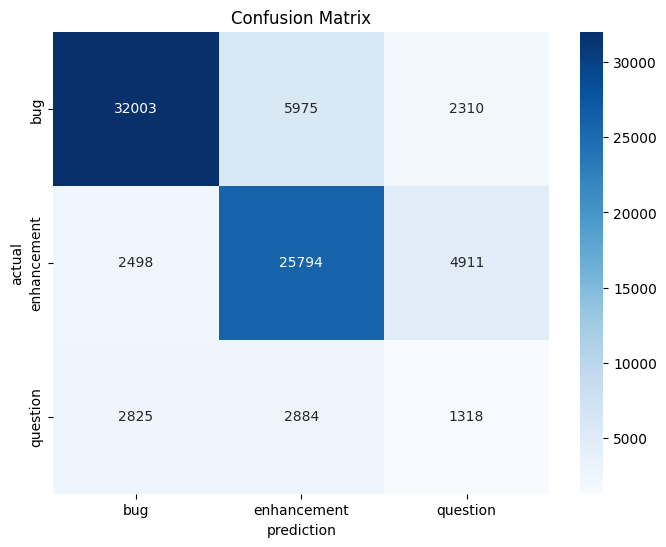

In [48]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.857     0.794     0.825     40288
 enhancement      0.744     0.777     0.760     33203
    question      0.154     0.188     0.169      7027

    accuracy                          0.734     80518
   macro avg      0.585     0.586     0.585     80518
weighted avg      0.749     0.734     0.741     80518

